<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-서비스-기획" data-toc-modified-id="1.-서비스-기획-1">1. 서비스 기획</a></span></li><li><span><a href="#2.-OCR-테스트" data-toc-modified-id="2.-OCR-테스트-2">2. OCR 테스트</a></span><ul class="toc-item"><li><span><a href="#2.1.-Google-OCR-API" data-toc-modified-id="2.1.-Google-OCR-API-2.1">2.1. Google OCR API</a></span></li><li><span><a href="#2.2.-keras-ocr" data-toc-modified-id="2.2.-keras-ocr-2.2">2.2. keras-ocr</a></span></li><li><span><a href="#2.3.-Tesseract" data-toc-modified-id="2.3.-Tesseract-2.3">2.3. Tesseract</a></span></li></ul></li><li><span><a href="#3.-테스트-결과-분석" data-toc-modified-id="3.-테스트-결과-분석-3">3. 테스트 결과 분석</a></span><ul class="toc-item"><li><span><a href="#4.-결론" data-toc-modified-id="4.-결론-4">4. 결론</a></span></li></ul></div>

# 1. 서비스 기획
- 서비스명: 내 화면 글씨 읽기
- 서비스 개요
    - 현재 화면의 글씨를 읽음
- 중요한 점
    - 한글 인식
    - 화면속 사진 인식
    - 사람의 글씨 인식
    - 오인없나

# 2. OCR 테스트
## 2.1. Google OCR API

In [1]:
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/a'
file_list = os.listdir(img_dir)
file_list

['2021-09-21 (8).png',
 '2021-09-21 (18).png',
 '2021-09-21 (17).png',
 '2021-09-21 (15).png',
 '2021-09-21 (14).png',
 '2021-09-21 (10).png',
 '2021-09-21 (7).png',
 '2021-09-21 (2).png',
 '2021-09-21 (4).png',
 '2021-09-21 (3).png',
 '2021-09-21 (13).png',
 '2021-09-21 (6).png',
 '2021-09-21 (9).png',
 '2021-09-21 (1).png',
 '2021-09-21.png',
 '2021-09-21 (11).png',
 '2021-09-21 (5).png',
 '2021-09-21 (12).png',
 '2021-09-21 (19).png',
 '2021-09-21 (16).png']

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/buoyant-notch-326707-db696391c039.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[2021-09-21 (8).png]
Texts:

"G 한글- Google 검색
A google.com/search?q=&tbm=isch&ved=D2ahUKEwiM25bFyY_zAhUkEqYKHQbvBnwQ2-cCegQIABAA&oq=&gs_lcp=CgNpbWcQAzIHCCMQ7wMQJ..
무일
토렌트 > 도서/만..
⑤ 토렌트 그룹 > 도서..
[취재파일] 15전투
① "연예인 동생이 가
김지훈 일병 자살
■ 유언비어-공군 병..
유언비어-아름다운
기타 북마크
>>
Gegle
한글
무일
pinterest.co.kr
funmom.tistory.com
edujin.co.kr
m.bucheontimes.com
youtube.com
koya-culture.com
Cia-Cia alphabets and pronuciation
나랏말쏘미 듕궈에 달아
문쫑와로 서르 소 못디 아니 홀씨
이런 전초로 어린 빅성이
니르고져 홈배 이셔도
무좀내 제 뜨들 시러 퍼디
몸 노미 하니라
내 이를 윙호야 어 엿비 너겨
새로 스믈여들 쫑를 밍구노니
사롬마다 힌여 수비 니겨 날로 뿌메
Coesonants
가
나
k
dh
rgh
m
[g]
[k]
[n]
[d]
[] [r] []
[m]
[6]
viw
bh
h
한글 나라·한글 세상을 만든 선각자, 최원 산성
ng
其
双
ㅎ
박홍근(고어대 한국사연구소 연구교수)
스
[b] [p]
[s]
[2]
[h]
Vowels
a -l
Ja]
le]
[u]
한국출판문화산업진흥원
가나다 한글. 1(벽보)(별초롱 사운
해외로 나아간 한글, 좌절 뒤 다음 전략은 - 대학신문
한글 나라·한글 세상을 만든 선각자, 최현배 선생 - 뉴스페이퍼
font.kpipa.or.kr
kyobobook.co.kr
snunews.com
news-paper.co.kr
TNO
한 권으로 끝내는
a
한글
央民對回吉口
g/k
'한글
떼기
游用
1字
威市」
eu
사
r/l
|感 叫
초등 교사이자 두 마이 엄마엄
한글 - 위키백과, 우리 모두의 백과사전
세계인의 칭찬을 한 몸에 받는 한..
한

## 2.2. keras-ocr

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


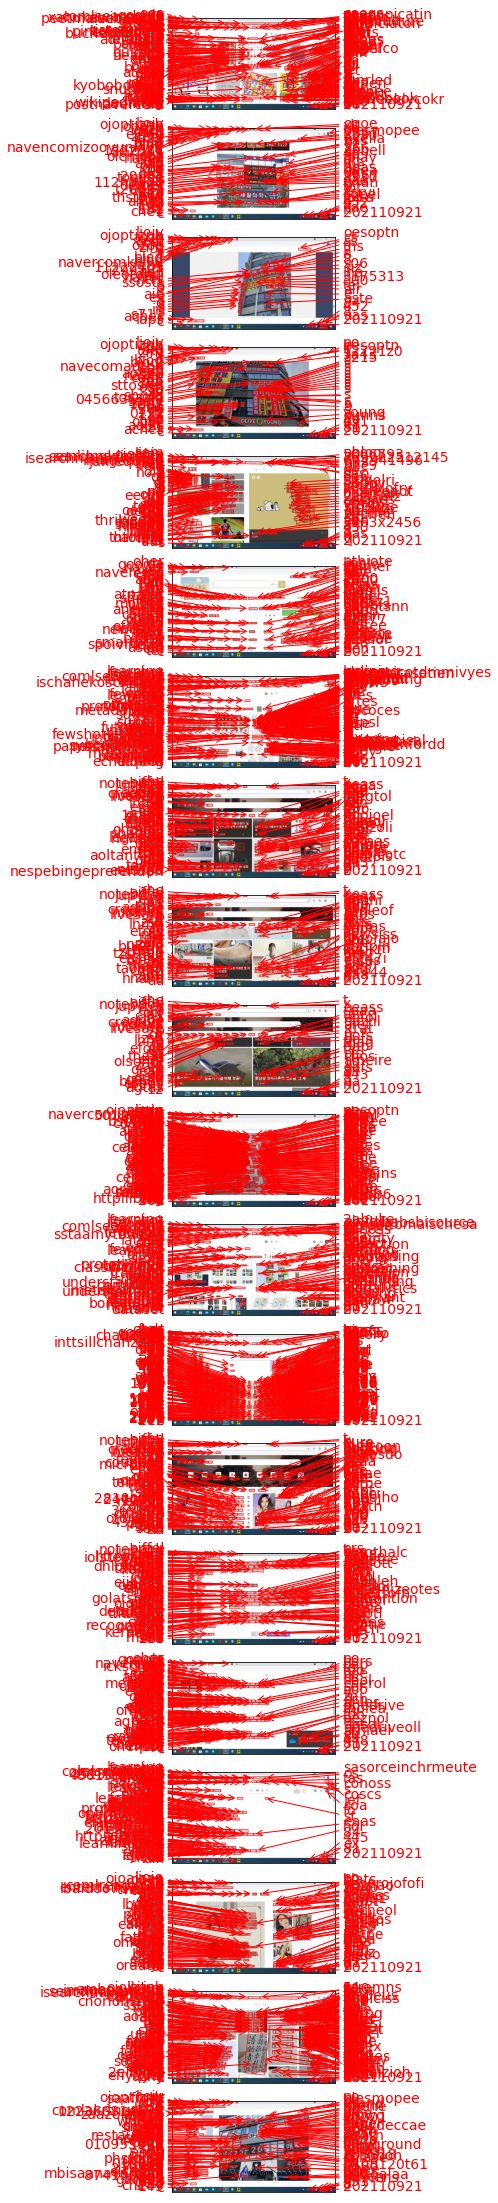

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2.3. Tesseract

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [8]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[2021-09-21 (8).png]
(ㄱ

안글

“8

(700016@

검색

|.

+

<

(젖

~"

000016.0010/5623『017<?:0=

<.


툰레트

>

두


/

마

른


토렌트

그름

>

도 서

(】


쥐

새

바일]

1]

5선

=

른

그

"여 예 인

동생

한글

(500010

21

171

』

6 (6; |

14101710171.115101\.06017ㅠ

6@0니1104.60.

나

라

말

^

미

등귀

에

달아

그 움

와


서

트

^

노 ㄴㄴ

|

아

니

오 ^

|

이런

셔

스 도

어리

빅

션0

|

니

‥……

기

져

고니

|

이

석

>

10

조

내

세

8트

글

시려

1

디

근-


누비

하니라

내

0| 도

위


아

어1

여너


녀

겨

로

~

1 구

여

~

6


및

고

〉

니

무

마다

이 써

스

년

니

겨

날로

뿌

메

사

--^ 밥

땅은 ~

~ 9 = 개

0000

ㅎㅎ 0 ㅠ

ㅣ

. 을 @애

ㅣ

안

국

줄

파

=

와

산

법

신흥원

(0011

}

0103.00.

이

가나다

안글.

]

[벽

문

)

(별

소동

^

;

100000아<.00.

우,

7

0/ <

그

때 0

:쓰

된

도

웃

석

|1츠

|

다

악



는

가

+

을

0

001]


11 ㅠ-


1 /|

[그

안글


“0

히들[

|

나기 가 그그이니

나 10이과2



# 3. 테스트 결과 분석

In [9]:
def compare_ocr(file):
    print('[keras-ocr]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('\n[Google OCR]')
    detect_text(os.path.join(img_dir, file))
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

## 3.1. 한글인식
- 세 가지 방법 모두 텍스트를 대체적으로 잘 못 인식함
- Google OCR이 그나마 나음
- keras-ocr는 글자는 잘 찾지만 한글을 모름.
- Tesseract는 그냥 인식 자체를 못하나보다 싶다.

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


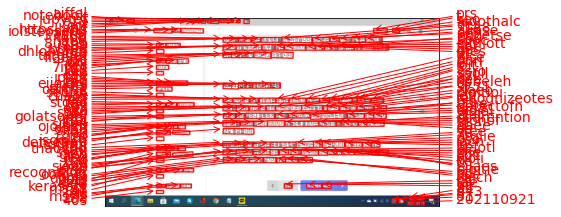


[Google OCR]
Texts:

"Aiffel
E18_ocr_pjt - Jupyter Notebook
https://Ims.aiffel.io/steps2/343
3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를
빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을
하는 역할을 맡게 되었다고 가정합니다.
18-1. 들어가며
15분
18-2. 기계가 읽을 수
있나요?
40분
18-3. 어떤 과정으로
읽을까요?
Step1. 검증용 데이터셋 준비
15분
</>
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에
영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난
특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지
데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는
것도 중요합니다.
18-4. 딥러닝 문자인식의
시작
15분
18-5. 사진 속 문자
찾아내기-detection
15분
18-6. 사진 속 문자
읽어내기-recognition
가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은
이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는
아무리 많아도 20장을 넘기지 않는 것으로 합시다.
60분
18-7. keras-ocr 써보기
40분
18-8. 테서랙트 써보기
이전
프로젝트 제출
>
40분
오후 4:43
ㅇ
TALK
2021-09-21
!!
"

"Aiffel"

"E18_ocr_pjt"

"-"

"Jupyter"

"Notebook"

"https://Ims.aiffel.io/steps2/343"

"3"

"가지"

"를"

"검증"

"해"

"보는"

"프로젝트"

"를"

"진행"

"하겠습니다"

"."

"여러분"

"은"

"OCR"



In [12]:
compare_ocr('2021-09-21.png')

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


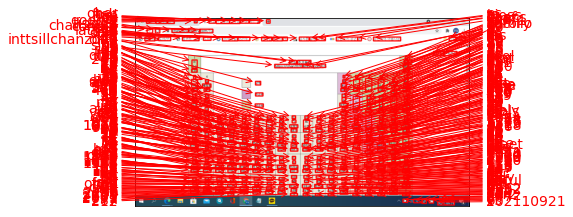


[Google OCR]
Texts:

"G 한글- Google 검색
.:. 원소 주기율표 고화질 (한글 명칭 ×
A chan2020.tistory.com/10
(무일
토렌트 > 도서/만
⑤ 토렌트 그룹 > 도서
[취재파일] 15전투
① "연예인 동생이 가
김지훈 일병 자살..
□ 유언비어-공군 병
유언비어-아름다운
기타 북마크
>>
초무블 구독하기
1
2
원소 주기율표
https://chan2020. tistory.com/10
Не
수소
헬륨
1.01
4.00
9
3
4
7
8.
10
F
Li
Be
Ne
금속
플루오
리듬
베릴륨
붕소
탄소
질소
산소
네온
르
6.94
9.01
10.8
12.0
14.0
16.0
20.2
19.0
준금속
11
12
13
14
15
16
17
18
Na
Mg
마그네
Al
Si
S
CI
Ar
소듬
비금속
알루미
규소
인
황
염소
아르곤
23.0
습
28.1
31.0
32.1
35.5
40.0
24.3
27.0
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
Sc
Co
Se
셸레늄
K
Ca
Ti
V
Cr
Mn
Fe
Ni
Cu
Zn
Ga
Ge
As
Br
Kr
포타슘
칼슘
스칸듐
티타늄
바나듐
크롬
망간
철
코발트
니켈
구리
아연
갈륨
저마늄
비소
브로민
크립톤
39.1
40.1
45.0
47.9
51.0
52.0
54.9
55.8
58.9
58.7
63.5
65.4
69.7
72.6
74.9
79.0
79.9
83.8
38
40
42
43
51
53
37
39
41
44
45
46
47
48
49
50
52
54
Zr
지르코
Мо
몰리브
Sr
Tc
Sb
I
Rb
Y
Nb
Ru
Rh
Pd
Ag
Cd
In
Sn
Te
Xe
스트론
테크네
안티모
아이오
루비듬
이트륨
니오붐
루테뉴
로듬
팔라듬
은
카드뮴
인듬
주석
텔루름
제는
듬
늠
덴
듬
니
딘
85.5
88.9
92.9
101.0
103.0
106.4
107.9
112.4
114.8
118.7
127.6
131.3
87.6
91.2
95.

In [16]:
compare_ocr('2021-09-21 (9).png')

## 3.2. 사진속의 글씨
- 공통 : 숫자는 잘 인식하는 듯.
- Google OCR 꽤 좋음
- keras-ocr 찾기만 잘함
- Tesseract = 바보

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


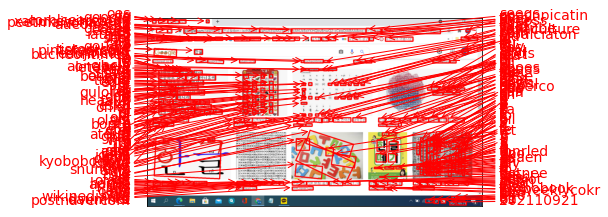


[Google OCR]
Texts:

"G 한글- Google 검색
A google.com/search?q=&tbm=isch&ved=D2ahUKEwiM25bFyY_zAhUkEqYKHQbvBnwQ2-cCegQIABAA&oq=&gs_lcp=CgNpbWcQAzIHCCMQ7wMQJ..
무일
토렌트 > 도서/만..
⑤ 토렌트 그룹 > 도서..
[취재파일] 15전투
① "연예인 동생이 가
김지훈 일병 자살
■ 유언비어-공군 병..
유언비어-아름다운
기타 북마크
>>
Gegle
한글
무일
pinterest.co.kr
funmom.tistory.com
edujin.co.kr
m.bucheontimes.com
youtube.com
koya-culture.com
Cia-Cia alphabets and pronuciation
나랏말쏘미 듕궈에 달아
문쫑와로 서르 소 못디 아니 홀씨
이런 전초로 어린 빅성이
니르고져 홈배 이셔도
무좀내 제 뜨들 시러 퍼디
몸 노미 하니라
내 이를 윙호야 어 엿비 너겨
새로 스믈여들 쫑를 밍구노니
사롬마다 힌여 수비 니겨 날로 뿌메
Coesonants
가
나
k
dh
rgh
m
[g]
[k]
[n]
[d]
[] [r] []
[m]
[6]
viw
bh
h
한글 나라·한글 세상을 만든 선각자, 최원 산성
ng
其
双
ㅎ
박홍근(고어대 한국사연구소 연구교수)
스
[b] [p]
[s]
[2]
[h]
Vowels
a -l
Ja]
le]
[u]
한국출판문화산업진흥원
가나다 한글. 1(벽보)(별초롱 사운
해외로 나아간 한글, 좌절 뒤 다음 전략은 - 대학신문
한글 나라·한글 세상을 만든 선각자, 최현배 선생 - 뉴스페이퍼
font.kpipa.or.kr
kyobobook.co.kr
snunews.com
news-paper.co.kr
TNO
한 권으로 끝내는
a
한글
央民對回吉口
g/k
'한글
떼기
游用
1字
威市」
eu
사
r/l
|感 叫
초등 교사이자 두 마이 엄마엄
한글 - 위키백과, 우리 모두의 백과사전
세계인의 칭찬을 한 몸에 받는 한..
한글교육, 기본

In [10]:
compare_ocr('2021-09-21 (8).png')

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


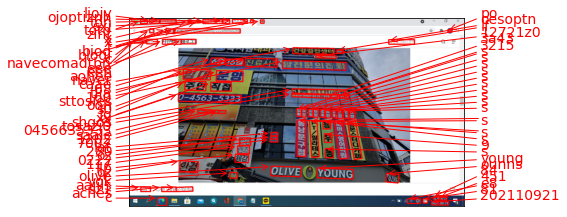


[Google OCR]
Texts:

"N 간판 : 네이버 이미지검색
천안병원간판 설치 - 경관조명 :
(무일
A blog.naver.com/adstorysblog/222496940266
이 블로그에서 검색
NAVER 블로그 사인팩토리 블로그:)
건강검진센터 4F
292-2920
6월 16일 진료시작 맘 전문 의진료
임머 분양
주민 직접
3 층임대60평)
010-5465-3275/010-3443-3275
0-4563-5333
장주동님점 T292.7062
용
JINYS
9 와 쌍
0목 사
296-
0222
안경
렌즈
체감
인경
국민
OLIVE O YOUNG
OLIVES
공감 1
첫 댓글을 남겨보세요
오후 4:51
2021-09-21
TALK
무일
HO
0 아
PT/필라테스
|동남분구 점
+
"

"N"

"간판"

":"

"네이버"

"이미지"

"검색"

"천안"

"병원"

"간판"

"설치"

"-"

"경관"

"조명"

":"

"("

"무일"

"A"

"blog.naver.com/adstorysblog/222496940266"

"이"

"블로그"

"에서"

"검색"

"NAVER"

"블로그"

"사인"

"팩토리"

"블로그"

":)"

"건강"

"검진"

"센터"

"4F"

"292-2920"

"6"

"월"

"16"

"일"

"진료"

"시작"

"맘"

"전문"

"의"

"진료"

"임머"

"분양"

"주민"

"직접"

"3"

"층"

"임대"

"60"

"평"

")"

"010-5465-3275/010-3443-3275"

"0-4563-5333"

"장주동"

"님"

"점"

"T292.7062"

"용"

"JINYS"

"9"

"와"

"쌍"

"0"

"목"

"사"

"296-"

"0222"

"안경"

"렌즈"

"체감"

"인경"

"국민"

"OLIVE"

"O"

"YOUNG"

"OLIVES"

"공감"

"1"

"첫"

"댓글"

"을"

"남겨"

"보세요"

"오후"

"4:51"

In [11]:
compare_ocr('2021-09-21 (15).png')

## 3.3. 손글씨인식
- Google OCR 내용에 틀리는 부분이 있긴 하지만 괜찮은 편
- keras-ocr 역시 찾아내긴 하지만 한글이 안되니까 뭐 확인을 못하겠다.
- Tesseract는 텍스트를 아예 인식하지 못했다.

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


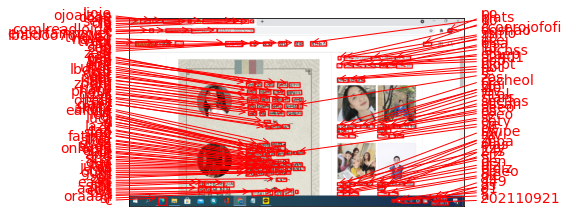


[Google OCR]
Texts:

"N 손글씨 : 네이버 이미지검색
N 이상미·장덕철·정시현, 추석 인사 ×
A entertain.naver.com/read?oid=144&aid=0000762795
(무일
NAVER TV|
뉴스
TV연예홈
TV
포토
랭킹
영화
최신뉴스
로그인
9 [단독인터뷰②]아이키 "처음 한 소개팅에서 결혼, 최고의 ….
10 이요원, 어딜 봐서 42살에 고3 엄마·…앞머리 내리니 대학…
연예가 HOT 포토
곁에 있는 사람의 응원과 온가가
타욱터 종하게 느껴지는 요즘입니다.
사장하는 분들과 행복한 사간 나무세요.
명점 건강하게 보내시고 힘내세요
o나 저를 자여와조추셔져 감사합니다.
김민정, 똑단밭이 이리 잘 어 '교포v' 기은세. 손가락 부상
울리다니.…
스타들의 일상 >
가수 이 상미 드림 부
에도 해…
스타들의 명절 인사 >
사랑하는 삼석분전 여러보든.
오랜만에 여렇게 연사드리네요 :)
A해 인사증권 계 열께 같e더 별써 한 허의
반 이상이 훈렀네요..
민호의 어영전 추석이 코맙어녀요!
A 안큼 연안건하게 가준듣과 행확한
연 보내시고, 무리는 글 만나는 날어 오겠죠 ?
모두른 풍성한 환가위 보내세요!!!
ITZY, 수록곡 'SWIPE' MV
티저 최.
김동규 '조비서 추석 인사드
려요'
스타들의 인터뷰 >
사상하는 가 문을과
컴백 티저 이미지 >
오후 4:49
TALK
무일
2021-09-21
..
"

"N"

"손글씨"

":"

"네이버"

"이미지"

"검색"

"N"

"이상미"

"·"

"장덕철"

"·"

"정시현"

","

"추석"

"인사"

"×"

"A"

"entertain.naver.com/read?oid=144&aid=0000762795"

"("

"무일"

"NAVER"

"TV|"

"뉴스"

"TV"

"연예"

"홈"

"TV"

"포토"

"랭킹"

"영화"

"최신"

"뉴스"

"로그인"

"9"

"["

"단독"

"인터뷰"

"②"

"]"

"아이"

"키"

"""

"처음"

"

In [13]:
compare_ocr('2021-09-21 (12).png')

[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


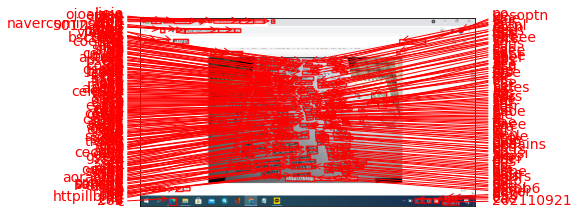


[Google OCR]
Texts:

"N 손글씨 : 네이버 이미지검색
[손글씨/명언모음] 펀치넬로 수제 x
A blog.naver.com/jn8668/150129401647
(무일
NAVER 블로그 펀치넬로
이 블로그에서 검색
NAVER PHOTO VIEWER
Engg eZ cen www.blan.naver.com/ In abbs
Linter
Januan
AHE
the
A A t
일
토요일
오 전주 마들
한는 제2의
설레인
y H..
S vet
ur
14
cwi
16
Stay
Imastaians
ngu
21
ant uer
a e t
도말은지 니않1 있다.
Fa
23-*
28
녹다고 생각이누
a 이라
De -S O.
Stor...
http://blog.naver.com/jn8b68
a In
공감 76
댓글 263
TALK
무일
오후 4:50
2021-09-21
+
"

"N"

"손글씨"

":"

"네이버"

"이미지"

"검색"

"["

"손글씨"

"/"

"명언"

"모음"

"]"

"펀치넬로"

"수제"

"x"

"A"

"blog.naver.com/jn8668/150129401647"

"("

"무일"

"NAVER"

"블로그"

"펀치넬로"

"이"

"블로그"

"에서"

"검색"

"NAVER"

"PHOTO"

"VIEWER"

"Engg"

"eZ"

"cen"

"www.blan.naver.com/"

"In"

"abbs"

"Linter"

"Januan"

"AHE"

"the"

"A"

"A"

"t"

"일"

"토요일"

"오"

"전주"

"마들"

"한는"

"제"

"2"

"의"

"설레"

"인"

"y"

"H.."

"S"

"vet"

"ur"

"14"

"cwi"

"16"

"Stay"

"Imastaians"

"ngu"

"21"

"ant"

"uer"

"a"

"e"

"t"

"도말"

"은지"

"니않"

"1"

"있다"

"."

"Fa"

"23-*"

"28"

"녹"

"다고

In [15]:
compare_ocr('2021-09-21 (13).png')

## 3.4. 오인
- 확인 가능하게 나오는게 구글뿐이라... 오인이 있긴 하다.

# 4. 결론
- 다양한 북커버 이미지를 대상으로 OCR 테스트를 진행한 결과를 정리해보면 아래 표와 같다.
- 결론적으로 세 가지 모델 중 해당 서비스에 가장 적절한 모델은 Google OCR이다.

평가기준|Google OCR|keras-ocr|Tesseract
--|:--:|:--:|:--:
한글인식|O|X|∆
사진인식|O|O|X
손글인식|O|O|X
안오인식|X|X|X
